In [1]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import sys

main_dir = "C:/Users/Aruay/Desktop/ra application/project/"

data = pd.read_csv(main_dir+'dataset/featureNormal_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

c:\Users\Aruay\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [3]:
df = data

In [4]:
df.shape

(1440, 196)

In [5]:
df

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,0.1,0.2,speaker
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037,1,1,1
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626,1,1,1
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532,1,1,1
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753,1,1,1
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015,0,8,24
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375,0,8,24
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219,0,8,24
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220,0,8,24


In [6]:
data.iloc[:,-3] == 0

0       False
1       False
2       False
3       False
4       False
        ...  
1435     True
1436     True
1437     True
1438     True
1439     True
Name: 0.1, Length: 1440, dtype: bool

In [7]:
X_speaker = df.iloc[:, -1].copy()
X = df.iloc[:, :-3].copy()
y = df.iloc[:,-2].copy()

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-673.301697,69.508095,-3.494582,18.998575,5.041687,4.626438,-7.605268,-0.057042,-16.231766,-0.299419,...,14.502933,15.547618,17.645388,31.995356,-0.051473,0.025316,-0.044013,-0.079353,0.022513,0.010037
1,-663.297852,67.747589,-6.961255,22.244839,5.313937,2.970508,-6.046401,-3.327282,-17.383774,0.806942,...,15.213718,15.513745,17.582760,31.223174,-0.079423,0.034342,-0.070702,-0.074578,0.025509,-0.001626
2,-664.776184,70.703842,-4.903909,18.797665,1.573513,4.084437,-6.752044,-3.895945,-15.839313,-2.361090,...,14.972030,15.697508,17.437520,31.753796,-0.024101,-0.010724,-0.007700,0.022802,-0.000364,0.032532
3,-660.674133,69.261803,-1.020717,19.743364,3.635317,6.417199,-5.448439,-4.090719,-15.130262,-1.551855,...,15.242136,15.597314,16.492804,30.522612,-0.065819,0.008619,0.004848,-0.030447,-0.000754,0.014753
4,-699.495178,76.727394,-1.602398,21.554548,4.587931,6.054961,-8.122147,-1.003357,-15.158166,-2.688365,...,14.636722,16.023571,17.020093,31.293542,-0.070505,0.011104,0.031151,-0.115693,0.024391,0.003346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-558.443298,34.201637,-25.876736,3.420890,-22.962826,-6.289969,-22.845768,-13.475706,-11.609130,-4.602691,...,16.391113,18.151034,17.573820,31.661293,-0.020466,0.014107,0.020899,0.050697,-0.005623,0.022015
1436,-509.914642,49.378990,-22.979485,-0.832579,-23.050257,-10.238819,-17.452888,-8.696088,-14.158811,0.367432,...,16.270073,17.091367,17.932740,31.846921,-0.040751,0.017479,0.014917,0.015533,0.016873,-0.000375
1437,-517.733276,40.459633,-27.217442,2.902560,-22.611633,-14.189220,-19.589163,-8.899709,-12.807209,3.745601,...,16.128660,16.947312,18.503842,31.628901,-0.032364,0.032572,-0.050994,0.009171,0.007204,0.013219
1438,-463.998352,35.496925,-14.260783,9.399699,-19.878208,0.799514,-18.052525,-4.351163,-7.299998,0.214021,...,16.307834,17.859030,17.360766,31.137002,-0.045889,0.027680,-0.042989,-0.060098,0.005997,-0.009220


In [9]:
y

0       1
1       1
2       1
3       1
4       2
       ..
1435    8
1436    8
1437    8
1438    8
1439    8
Name: 0.2, Length: 1440, dtype: int64

In [10]:
X_speaker

0        1
1        1
2        1
3        1
4        1
        ..
1435    24
1436    24
1437    24
1438    24
1439    24
Name: speaker, Length: 1440, dtype: int64

In [11]:
X.shape, y.shape

((1440, 193), (1440,))

In [12]:
from sklearn.utils import shuffle

X, y, X_speaker = shuffle(X, y, X_speaker, random_state=42)

In [13]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
168,-521.547302,77.956268,-19.427402,24.423990,-2.413774,-4.131415,-20.575113,-0.134967,-10.341573,0.376268,...,15.013307,16.916615,16.888602,30.432152,-0.020072,0.002151,-0.054975,-0.020576,-0.007031,-0.012101
605,-694.125427,89.352890,17.187904,34.136402,11.057952,19.835867,-1.449472,7.352085,-7.952507,7.914078,...,14.848684,16.186144,15.988606,32.257648,-0.025636,-0.007304,0.002849,-0.087648,0.018231,0.016679
548,-540.653687,64.695663,-12.093176,13.139149,-0.056961,-3.632231,-17.010035,-13.802145,-10.112307,1.112248,...,18.009618,18.633791,19.189384,29.731008,0.008775,0.009064,-0.000060,0.042931,-0.006792,0.007978
65,-635.038208,59.242809,-14.267573,14.177912,-10.723826,0.717458,-9.246791,-6.918327,-6.739667,-1.037649,...,16.948005,18.004542,16.561840,30.620014,-0.106044,0.033797,-0.075319,-0.052065,0.010273,0.003332
628,-518.686218,60.419811,1.542669,15.409612,-3.760008,4.728145,-3.595308,3.629540,-10.236009,0.922400,...,15.830307,17.281869,16.867927,31.741905,-0.019200,0.034101,0.003850,-0.049982,-0.031635,-0.005829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-619.984009,82.548264,-5.020515,23.687586,-7.415154,18.679161,-6.487446,-1.330336,-13.255409,3.743963,...,16.487207,17.587963,16.703692,31.808119,-0.000666,0.018995,-0.058539,0.018714,0.008222,-0.014984
1130,-409.385651,14.292880,-12.104706,9.623018,-33.162331,6.402128,-18.303886,-10.767341,-13.102248,-0.215422,...,18.456016,20.213013,18.576479,32.108141,-0.050081,-0.015172,0.003873,-0.038299,0.002588,-0.012119
1294,-413.710876,31.911446,-22.527260,2.865191,-12.242773,-9.204301,-14.855512,-9.888793,-23.490492,0.589525,...,18.166894,19.467459,19.658358,33.049526,-0.064942,0.005416,0.000700,-0.013876,0.025157,-0.012493
860,-593.926514,80.987335,-7.736116,21.117559,8.416611,-0.715257,-1.642369,1.938591,-7.679686,4.232740,...,15.803106,16.175938,18.370403,30.476102,-0.011916,0.039719,-0.040311,-0.064398,0.032557,0.013286


In [14]:
X_speaker

168      3
605     11
548     10
65       2
628     11
        ..
1095    19
1130    19
1294    22
860     15
1126    19
Name: speaker, Length: 1440, dtype: int64

In [15]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [16]:
y1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
X.shape, y1.shape

((1440, 193), (1440, 8))

In [18]:
X2_speaker = X_speaker.copy().to_numpy()
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [19]:
X2.shape, X2_speaker.shape, y2.shape

((1440, 193), (1440,), (1440,))

In [20]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM

from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [21]:
import random, numpy as np
from keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [22]:
X3=pd.DataFrame(X2)
X3

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
0,-521.547302,77.956268,-19.427402,24.423990,-2.413774,-4.131415,-20.575113,-0.134967,-10.341573,0.376268,...,15.013307,16.916615,16.888602,30.432152,-0.020072,0.002151,-0.054975,-0.020576,-0.007031,-0.012101
1,-694.125427,89.352890,17.187904,34.136402,11.057952,19.835867,-1.449472,7.352085,-7.952507,7.914078,...,14.848684,16.186144,15.988606,32.257648,-0.025636,-0.007304,0.002849,-0.087648,0.018231,0.016679
2,-540.653687,64.695663,-12.093176,13.139149,-0.056961,-3.632231,-17.010035,-13.802145,-10.112307,1.112248,...,18.009618,18.633791,19.189384,29.731008,0.008775,0.009064,-0.000060,0.042931,-0.006792,0.007978
3,-635.038208,59.242809,-14.267573,14.177912,-10.723826,0.717458,-9.246791,-6.918327,-6.739667,-1.037649,...,16.948005,18.004542,16.561840,30.620014,-0.106044,0.033797,-0.075319,-0.052065,0.010273,0.003332
4,-518.686218,60.419811,1.542669,15.409612,-3.760008,4.728145,-3.595308,3.629540,-10.236009,0.922400,...,15.830307,17.281869,16.867927,31.741905,-0.019200,0.034101,0.003850,-0.049982,-0.031635,-0.005829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-619.984009,82.548264,-5.020515,23.687586,-7.415154,18.679161,-6.487446,-1.330336,-13.255409,3.743963,...,16.487207,17.587963,16.703692,31.808119,-0.000666,0.018995,-0.058539,0.018714,0.008222,-0.014984
1436,-409.385651,14.292880,-12.104706,9.623018,-33.162331,6.402128,-18.303886,-10.767341,-13.102248,-0.215422,...,18.456016,20.213013,18.576479,32.108141,-0.050081,-0.015172,0.003873,-0.038299,0.002588,-0.012119
1437,-413.710876,31.911446,-22.527260,2.865191,-12.242773,-9.204301,-14.855512,-9.888793,-23.490492,0.589525,...,18.166894,19.467459,19.658358,33.049526,-0.064942,0.005416,0.000700,-0.013876,0.025157,-0.012493
1438,-593.926514,80.987335,-7.736116,21.117559,8.416611,-0.715257,-1.642369,1.938591,-7.679686,4.232740,...,15.803106,16.175938,18.370403,30.476102,-0.011916,0.039719,-0.040311,-0.064398,0.032557,0.013286


In [23]:
X3_speaker = pd.DataFrame(X2_speaker)
X3_speaker

,0
0,3
1,11
2,10
3,2
4,11
...,...
1435,19
1436,19
1437,22
1438,15


In [24]:
speakers = X_speaker.unique()
speakers

array([ 3, 11, 10,  2, 17, 24, 20,  5, 21, 16, 22, 12, 13,  6, 18, 14,  7,
        1, 15, 19,  9,  8, 23,  4], dtype=int64)

In [25]:
X3_col = X3_speaker.rename(columns={0: 'speaker'})
X3_col

,speaker
0,3
1,11
2,10
3,2
4,11
...,...
1435,19
1436,19
1437,22
1438,15


In [26]:
X_combined = pd.concat([X3, X3_col], axis=1)
X_combined

,0,1,2,3,4,5,6,7,8,9,...,184,185,186,187,188,189,190,191,192,speaker
0,-521.547302,77.956268,-19.427402,24.423990,-2.413774,-4.131415,-20.575113,-0.134967,-10.341573,0.376268,...,16.916615,16.888602,30.432152,-0.020072,0.002151,-0.054975,-0.020576,-0.007031,-0.012101,3
1,-694.125427,89.352890,17.187904,34.136402,11.057952,19.835867,-1.449472,7.352085,-7.952507,7.914078,...,16.186144,15.988606,32.257648,-0.025636,-0.007304,0.002849,-0.087648,0.018231,0.016679,11
2,-540.653687,64.695663,-12.093176,13.139149,-0.056961,-3.632231,-17.010035,-13.802145,-10.112307,1.112248,...,18.633791,19.189384,29.731008,0.008775,0.009064,-0.000060,0.042931,-0.006792,0.007978,10
3,-635.038208,59.242809,-14.267573,14.177912,-10.723826,0.717458,-9.246791,-6.918327,-6.739667,-1.037649,...,18.004542,16.561840,30.620014,-0.106044,0.033797,-0.075319,-0.052065,0.010273,0.003332,2
4,-518.686218,60.419811,1.542669,15.409612,-3.760008,4.728145,-3.595308,3.629540,-10.236009,0.922400,...,17.281869,16.867927,31.741905,-0.019200,0.034101,0.003850,-0.049982,-0.031635,-0.005829,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-619.984009,82.548264,-5.020515,23.687586,-7.415154,18.679161,-6.487446,-1.330336,-13.255409,3.743963,...,17.587963,16.703692,31.808119,-0.000666,0.018995,-0.058539,0.018714,0.008222,-0.014984,19
1436,-409.385651,14.292880,-12.104706,9.623018,-33.162331,6.402128,-18.303886,-10.767341,-13.102248,-0.215422,...,20.213013,18.576479,32.108141,-0.050081,-0.015172,0.003873,-0.038299,0.002588,-0.012119,19
1437,-413.710876,31.911446,-22.527260,2.865191,-12.242773,-9.204301,-14.855512,-9.888793,-23.490492,0.589525,...,19.467459,19.658358,33.049526,-0.064942,0.005416,0.000700,-0.013876,0.025157,-0.012493,22
1438,-593.926514,80.987335,-7.736116,21.117559,8.416611,-0.715257,-1.642369,1.938591,-7.679686,4.232740,...,16.175938,18.370403,30.476102,-0.011916,0.039719,-0.040311,-0.064398,0.032557,0.013286,15


In [27]:
# Get random 5 speakers

speaker_counts = X_combined['speaker'].value_counts()
selected_speakers = np.random.choice(speakers, size=5, replace=False)

print("Selected speakers:", selected_speakers)

Selected speakers: [ 3 15 22 20 10]


In [28]:
from skfeature.function.similarity_based import fisher_score

hist=[]
scores=[]
totalsize=1440
num_fea=125
a=create_index(kfold,totalsize)

for i in range (kfold):
    model_name = 'Model_'+str(i)
    savedir='ravdess_speaker_both'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    # Choose one test speaker from selected_speakers
    test_speaker = selected_speakers[i]

    # Use only speakers not in selected_speakers as training
    train_speakers = np.setdiff1d(speakers, [test_speaker])

    print(f"Fold {i+1}")
    print("Test speaker:", test_speaker)
    print("Train speakers:", train_speakers)

    # Get the indices for test and train
    train_indices = X_combined[X_combined['speaker'].isin(train_speakers)].index
    test_indices = X_combined[X_combined['speaker'] == test_speaker].index


    # Sanity check for overlaps
    overlap_indices = np.intersect1d(train_indices, test_indices)
    if len(overlap_indices) > 0:
        print(f"Overlap found in fold {i}! Overlapping indices: {overlap_indices}")
    else:
        print(f"No overlap in fold {i}.")

    
    # Prepare training and testing sets
    X_train = X_combined.drop(columns=['speaker']).iloc[train_indices, :]
    y_train = y1[train_indices, :]
    y_fs_train = y.iloc[train_indices]

    X_test = X_combined.drop(columns=['speaker']).iloc[test_indices, :]
    y_test = y1[test_indices, :]


    # fisher score
    X_fs = X_train.copy().to_numpy()
    X_test_fs = X_test.copy().to_numpy()
    y_fs = y_fs_train.copy().to_numpy()

    score  = fisher_score.fisher_score(X_fs, y_fs)
    sorted_indices = np.argsort(score)[::-1]
    fs_indices = sorted_indices[:num_fea]

    print("Selected FS indices:", fs_indices)
    
    selected_features_train = X_fs[:,fs_indices]
    selected_features_test = X_test_fs[:,fs_indices]

    X_train_s = pd.DataFrame(selected_features_train)
    X_test_s = pd.DataFrame(selected_features_test)

    x_traincnn =np.expand_dims(X_train_s, axis=2)
    x_testcnn= np.expand_dims(X_test_s, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00005, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)


    from keras.callbacks import EarlyStopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=200, restore_best_weights=True)

    hist.append(m1.fit(x_traincnn, y_train, batch_size=32, epochs=700, validation_data=(x_testcnn, y_test), callbacks=[early_stopping]))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))

    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)

Fold 1
Test speaker: 3
Train speakers: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
No overlap in fold 0.
Selected FS indices: [  0   2   1  16  43  30 120 136  80 162 156 177 150 151 167 149 178 127
 134 117  82  92  52 106 111 105 139 143 176 179 180 192 184 190 181 182
 183 189 175 173 148 154 165 153 140 130 164 159 145 161 155 142 169 172
 163 135 185 158 119 110  93  87  69  67 102  57  99 137 133 146 157 171
 170 108  17   7  31  27  75  63  85 128 141 121 152 125  97  38  77  91
  83 112 100  72  88  89 131 138 118  60  96 116  95 109  73  68  90 144
  86  79  98 113 107  71 147 168  66  70 115 122 123 132  40  20  53]
0
Epoch 1/700
44/44 [==============================] - 7s 118ms/step - loss: 2.1346 - accuracy: 0.1942 - val_loss: 2.1877 - val_accuracy: 0.1667
Epoch 2/700
44/44 [==============================] - 5s 103ms/step - loss: 2.0127 - accuracy: 0.2225 - val_loss: 1.9723 - val_accuracy: 0.2333
Epoch 3/700
44/44 [==============================] 

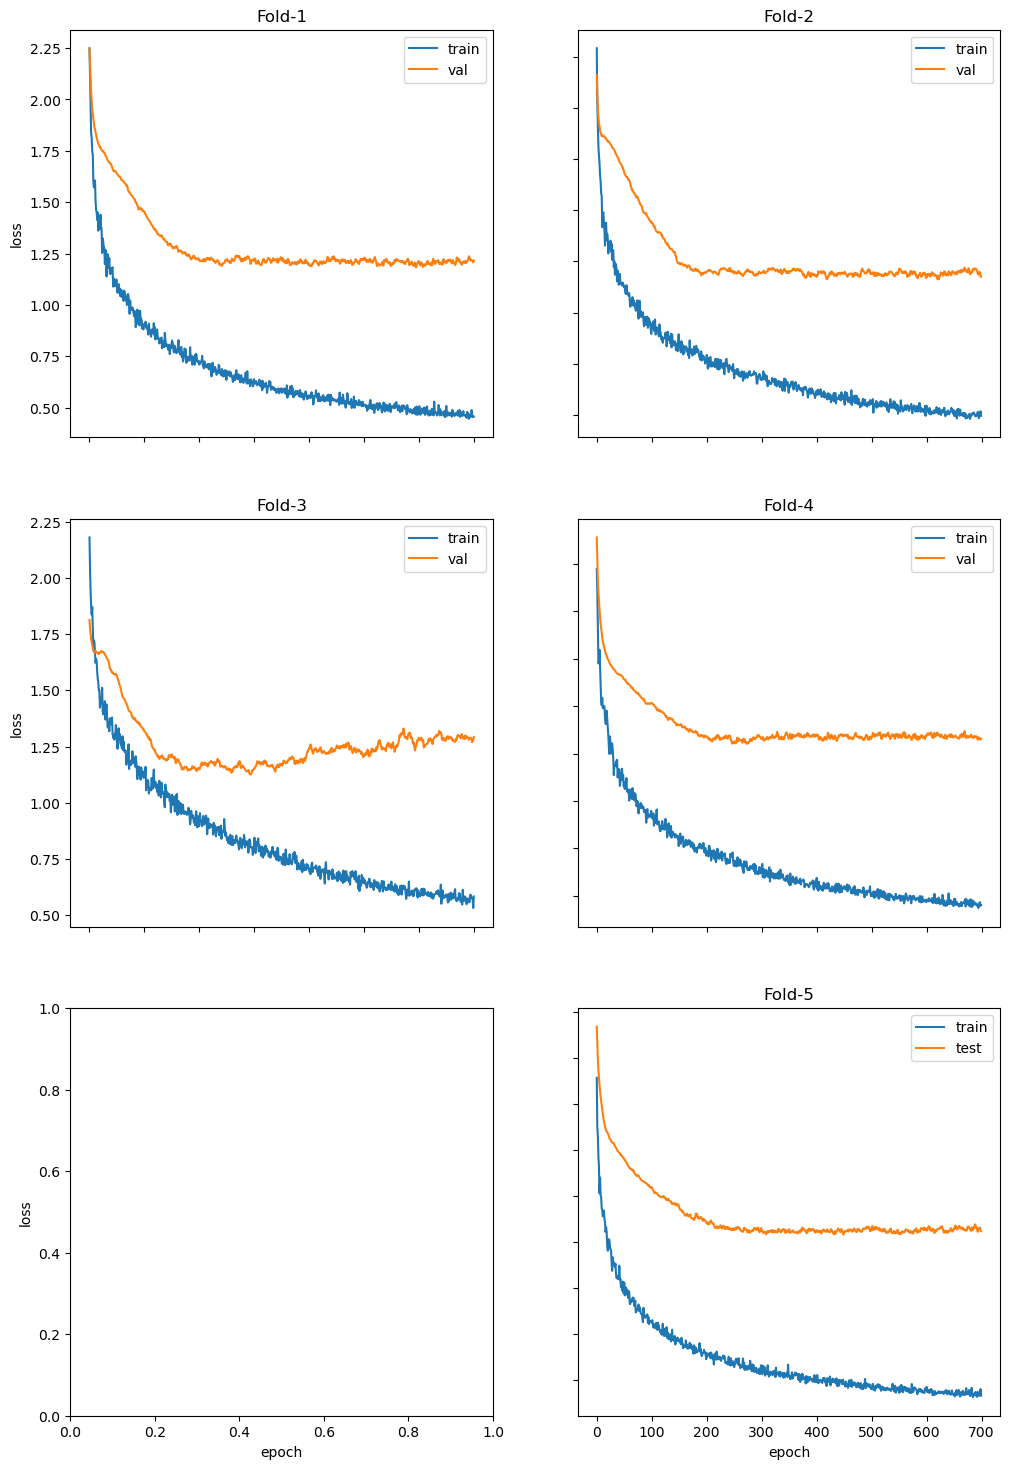

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'val'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'val'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'val'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'val'], loc='upper right')

axs[2, 1].plot(hist[4].history['loss'])
axs[2, 1].plot(hist[4].history['val_loss'])
axs[2, 1].set_title('Fold-5')
axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('emodbFemale_4Folds_65.png')

In [39]:
# loading json and creating model
from keras.models import model_from_json
savedir='ravdess_speaker_both'
m='Model_0'

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir + '/' + m + '.h5')
print("Loaded model from disk")

Loaded model from disk


In [40]:
import numpy as np
import tensorflow as tf
import keras
opt = keras.optimizers.RMSprop(learning_rate=0.00005, decay=1e-6)

Xloaded=np.load(savedir+'/X0.npy')
yloaded=np.load(savedir+'/y0.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 46.67%


Fold 0: 46.67%

Fold 1: 35.00%

Fold 2: 45.00%

Fold 3: 45.00%

Fold 4: 40.00%

In [41]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 1s 31ms/step
(60, 8)
60


array([[1, 0, 0, 0, 0, 0, 0, 3],
       [0, 5, 1, 0, 0, 0, 2, 0],
       [0, 0, 3, 1, 2, 1, 0, 1],
       [0, 3, 1, 1, 0, 1, 0, 2],
       [1, 0, 2, 1, 4, 0, 0, 0],
       [0, 0, 1, 2, 0, 4, 1, 0],
       [0, 1, 2, 0, 0, 0, 5, 0],
       [0, 0, 0, 1, 1, 0, 1, 5]], dtype=int64)

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 8):
    sumik = np.sum(array[it])
    for it2 in range(0, 8):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[25.   0.   0.   0.   0.   0.   0.  75. ]
 [ 0.  62.5 12.5  0.   0.   0.  25.   0. ]
 [ 0.   0.  37.5 12.5 25.  12.5  0.  12.5]
 [ 0.  37.5 12.5 12.5  0.  12.5  0.  25. ]
 [12.5  0.  25.  12.5 50.   0.   0.   0. ]
 [ 0.   0.  12.5 25.   0.  50.  12.5  0. ]
 [ 0.  12.5 25.   0.   0.   0.  62.5  0. ]
 [ 0.   0.   0.  12.5 12.5  0.  12.5 62.5]]


           angry  calm  disgust  fearful  happy  neutral   sad  surprised
angry       25.0   0.0      0.0      0.0    0.0      0.0   0.0       75.0
calm         0.0  62.5     12.5      0.0    0.0      0.0  25.0        0.0
disgust      0.0   0.0     37.5     12.5   25.0     12.5   0.0       12.5
fearful      0.0  37.5     12.5     12.5    0.0     12.5   0.0       25.0
happy       12.5   0.0     25.0     12.5   50.0      0.0   0.0        0.0
neutral      0.0   0.0     12.5     25.0    0.0     50.0  12.5        0.0
sad          0.0  12.5     25.0      0.0    0.0      0.0  62.5        0.0
surprised    0.0   0.0      0.0     12.5   12.5      0.0  12.5       62.5



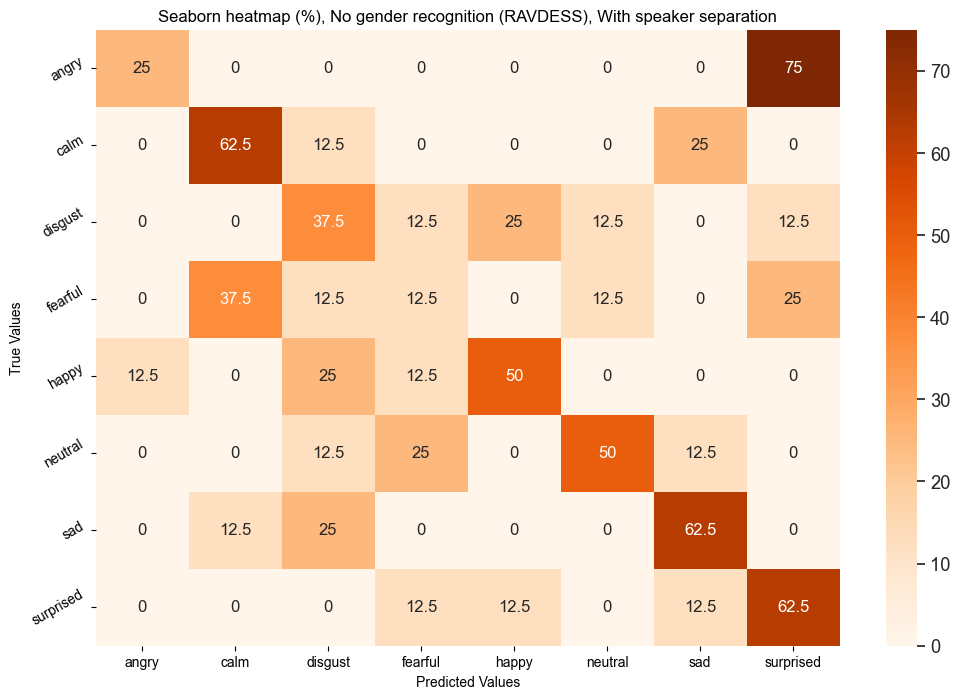

In [43]:
listik = ['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%), No gender recognition (RAVDESS), With speaker separation')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()